# Chapter 11 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

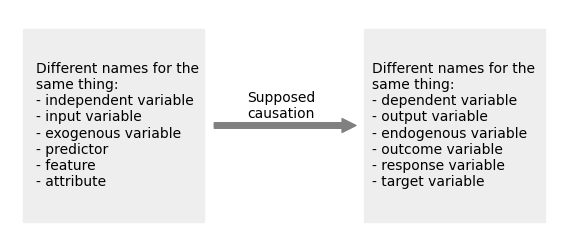

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

def text(ax, xcenter, ycenter, text, va="center", ha="center", **kwargs):
    ax.text(xcenter, ycenter, text, va=va, ha=ha, **kwargs)

def arrow(ax, fromPosition, toPosition, **kwargs):
    arrow = FancyArrowPatch(fromPosition, toPosition, mutation_scale=20, color='grey',
                    **kwargs)
    ax.add_patch(arrow)

def box(ax, xy, width, height, **kwargs):
    kwargs['color'] = kwargs.get('color', 'grey')
    kwargs['fill'] = kwargs.get('fill', False)
    rect = Rectangle(xy, width, height, **kwargs)
    ax.add_patch(rect)

fig, ax = plt.subplots(figsize=[7, 3])

box(ax, (-5, 10), 70, 20, color="#eee", fill=True)
arrow(ax, (68, 20), (125, 20))
box(ax, (127, 10), 70, 20, color="#eee", fill=True)
content = '\n'.join([
    "Different names for the",
    "same thing:",
    "- independent variable",
    "- input variable",
    "- exogenous variable",
    "- predictor",
    "- feature",
    "- attribute",
])
text(ax, 0, 20, content, ha="left")
content = '\n'.join([
    "Different names for the",
    "same thing:",
    "- dependent variable",
    "- output variable",
    "- endogenous variable",
    "- outcome variable",
    "- response variable",
    "- target variable",
])
text(ax, 130, 20, content, ha="left")
text(ax, 95, 22, "Supposed\ncausation")

ax.set_xlim(-10, 200)
ax.set_ylim(8, 32)
ax.set_axis_off()
plt.show()

# Example: Housing prices

 Load the data

In [4]:
housing = pd.read_csv("boston-housing.csv")
housing.head()

,CRIM,RM,MEDV
0,0.40771,6.164,21.7
1,0.06263,6.593,22.4
2,0.55778,6.335,18.1
3,0.32982,5.822,18.4
4,0.11027,6.456,22.2


 Plot the data

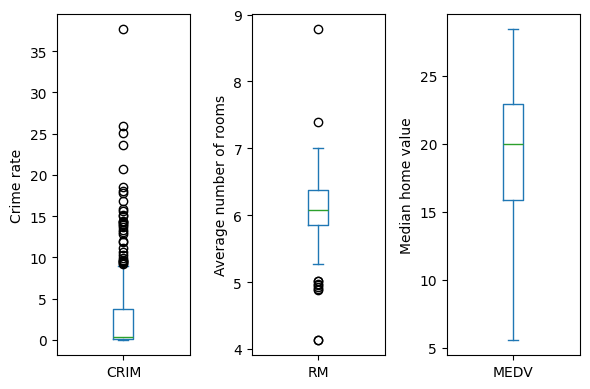

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(6, 4))
housing["CRIM"].plot.box(ax=axes[0])
axes[0].set_ylabel("Crime rate")
housing["RM"].plot.box(ax=axes[1])
axes[1].set_ylabel("Average number of rooms")
housing["MEDV"].plot.box(ax=axes[2])
axes[2].set_ylabel("Median home value")
plt.tight_layout()
plt.show()

 Calculate correlation matrix

In [6]:
housing.corr()

,CRIM,RM,MEDV
CRIM,1.000000,-0.116051,-0.600458
RM,-0.116051,1.000000,0.365906
MEDV,-0.600458,0.365906,1.000000


## Multiple linear regression using statsmodels

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("MEDV ~ CRIM + RM", data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1431.9896
Date:               2024-02-24 10:31 BIC:                1442.7514
No. Observations:   267              Log-Likelihood:     -712.99  
Df Model:           2                F-statistic:        107.8    
Df Residuals:       264              Prob (F-statistic): 6.03e-35 
R-squared:          0.449            Scale:              12.357   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5088    2.8215    0.8892  0.3747  -3.0467   8.0643
CRIM          -0.4904    0.0399  -12.3025  0.0000  -0.5689  -0.4119
RM             3.0083    0.4606    6.5311  0.0000   2.1013   3.9152
------------------------------------------------------------------
Omnibus

## Multiple linear regression using interaction terms

In [8]:
model_i = smf.ols("MEDV ~ CRIM * RM", data=housing).fit()
print(model_i.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.485    
Dependent Variable: MEDV             AIC:                1413.2655
Date:               2024-02-24 10:31 BIC:                1427.6145
No. Observations:   267              Log-Likelihood:     -702.63  
Df Model:           3                F-statistic:        84.43    
Df Residuals:       263              Prob (F-statistic): 2.74e-38 
R-squared:          0.491            Scale:              11.477   
-------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     -7.6236    3.4973  -2.1799  0.0302  -14.5098  -0.7374
CRIM           1.2469    0.3790   3.2898  0.0011    0.5006   1.9932
RM             4.6799    0.5733   8.1627  0.0000    3.5510   5.8089
CRIM:RM       -0.2916    0.0633  -4.6073  0.0000   -0.4162  -0.1670
------

# Assumptions

 Random distribution

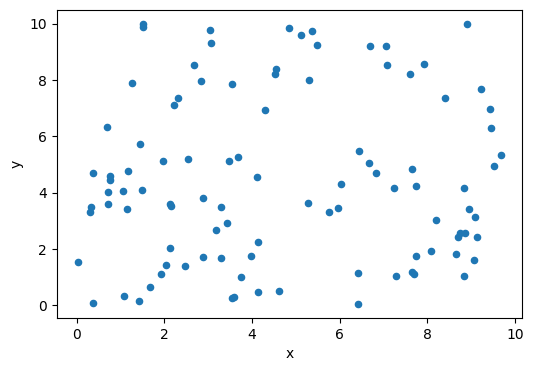

In [9]:
data = pd.DataFrame({
    "x": [random.uniform(0, 10) for i in range(100)],
    "y": [random.uniform(0, 10) for i in range(100)],
})
fig, ax = plt.subplots(figsize=(6, 4))
data.plot.scatter(x="x", y="y", ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

 Visualize predicted vs. residual for model without interaction term

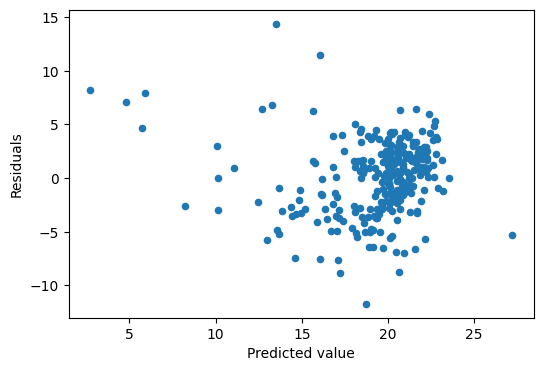

In [10]:
housing["predicted"] = model.predict(housing)
housing["residual"] =  housing["MEDV"] - housing["predicted"]

fig, ax = plt.subplots(figsize=(6, 4))
housing.plot.scatter(x="predicted", y="residual", ax=ax)
ax.set_xlabel("Predicted value")
ax.set_ylabel("Residuals")
housing.to_csv("boston-housing-model.csv")
plt.show()

 QQ-plot for residuals

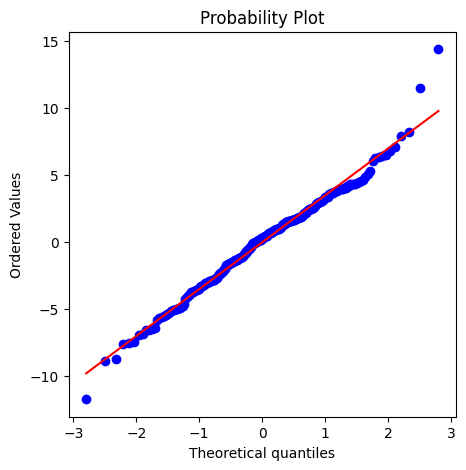

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(housing["residual"], plot=ax)
plt.show()

# Example PEFR: resampling model coefficients

 Load the data and train regression model

In [12]:
pefr = pd.read_csv("pefr.txt", sep="\t")
predictors = ["exposure"]
outcome = "pefr"

model = LinearRegression()
model.fit(pefr[["exposure"]], pefr["pefr"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 424.58
Slope: -4.184576


 Regression via resampling: single bootstrap sample

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


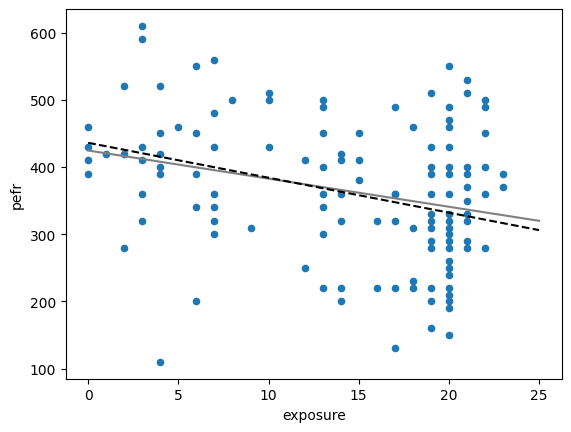

In [13]:
random.seed(123)
# we resample index values with replacement
box = list(pefr.index)
intercepts = []

# resample with replacement
resample = random.choices(box, k=len(box))
# train regression model
model_r = LinearRegression()
model_r.fit(pefr.loc[resample, predictors], pefr.loc[resample, outcome])

ax = pefr.plot.scatter(x="exposure", y="pefr")
ax.plot([0, 25], model.predict([[0], [25]]), color="grey")
ax.plot([0, 25], model_r.predict([[0], [25]]), color="black", linestyle="--")
plt.show()

 Resample the data and train regression model

In [14]:
random.seed(123)
# we resample index values with replacement
box = list(pefr.index)
intercepts = []
coefficients = {coef: [] for coef in predictors}
for _ in range(1000):
    # resample with replacement
    resample = random.choices(box, k=len(box))
    # train regression model
    model_r = LinearRegression()
    model_r.fit(pefr.loc[resample, predictors], pefr.loc[resample, outcome])
    intercepts.append(model_r.intercept_)
    for coef in predictors:
        coefficients[coef].append(model_r.coef_[0])
intercepts = np.array(intercepts)
coefficients = {coef: np.array(values) for coef, values in coefficients.items()}

 Calculate confidence intervals for intercept

Intercept 90% CI: [389.46 457.23]


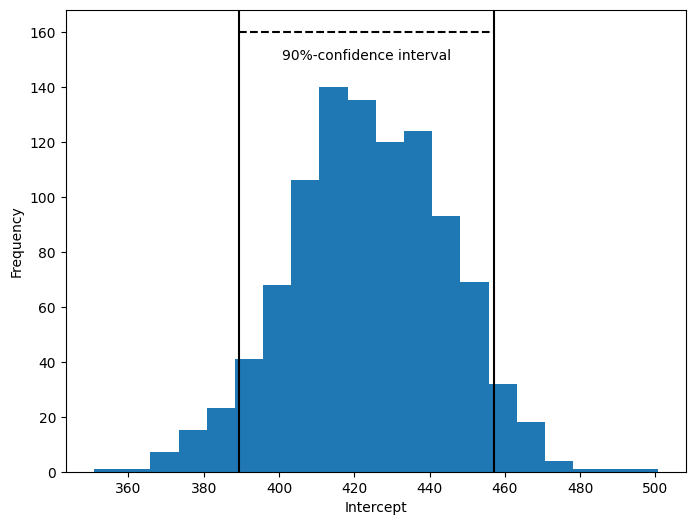

In [15]:
ci_interval_intercept = np.percentile(intercepts, [5, 95])
print(f"Intercept 90% CI: {ci_interval_intercept.round(2)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(intercepts, bins=20)
for ci in ci_interval_intercept:
    ax.axvline(ci, color="black")
ax.plot(ci_interval_intercept, [160, 160], color="black", linestyle="--")
ax.text(ci_interval_intercept.mean(), 150, "90%-confidence interval", ha="center")

ax.set_xlabel("Intercept")
ax.set_ylabel("Frequency")
plt.show()

 Calculate confidence intervals for coefficients / slope

Intercept 90% CI: [-6.32 -1.88]


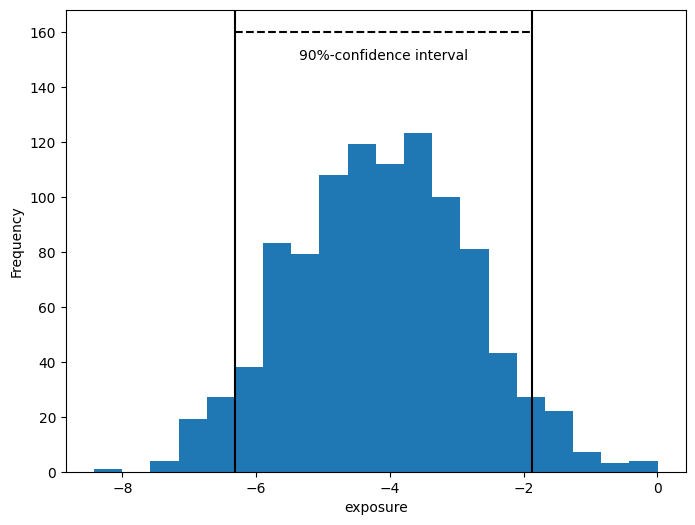

In [16]:
ci_coefficients = {coef: np.percentile(values, [5, 95])
                   for coef, values in coefficients.items()}
coef = "exposure"
print(f"Intercept 90% CI: {ci_coefficients[coef].round(2)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(coefficients[coef], bins=20)
for ci in ci_coefficients[coef]:
    ax.axvline(ci, color="black")
ax.plot(ci_coefficients[coef], [160, 160], color="black", linestyle="--")
ax.text(ci_coefficients[coef].mean(), 150, "90%-confidence interval", ha="center")

ax.set_xlabel(coef)
ax.set_ylabel("Frequency")
plt.show()

# Interpreting Software Output

In [17]:
model = smf.ols("pefr ~ exposure", data=pefr).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.069    
Dependent Variable: pefr             AIC:                1475.3501
Date:               2024-02-24 10:31 BIC:                1480.9581
No. Observations:   122              Log-Likelihood:     -735.68  
Df Model:           1                F-statistic:        9.974    
Df Residuals:       120              Prob (F-statistic): 0.00201  
R-squared:          0.077            Scale:              10290.   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   424.5828   20.7960  20.4165  0.0000  383.4081  465.7575
exposure     -4.1846    1.3250  -3.1582  0.0020   -6.8079   -1.5612
------------------------------------------------------------------
Omnibus:              0.767         Durbin-Watson:           1.111
Prob(Omn

 ANOVA analysis

In [18]:
import statsmodels.api as sm
print(sm.stats.anova_lm(model))

             df        sum_sq        mean_sq         F    PR(>F)
exposure    1.0  1.026333e+05  102633.255269  9.974366  0.002008
Residual  120.0  1.234764e+06   10289.702381       NaN       NaN


# Example: Bootstrapping the Boston Housing model

 Prepare the dataset

In [19]:
housing = pd.read_csv("boston-housing.csv")
outcome = "MEDV"
predictors = ["CRIM", "RM"]

 implement bootstrapping procedure

In [20]:
random.seed(123)

box = list(housing.index)
intercepts = []
coefficients = {coef: [] for coef in predictors}
for _ in range(1000):
    # resample with replacement
    resample = random.choices(box, k=len(box))
    # train regression model
    model_r = LinearRegression()
    model_r.fit(housing.loc[resample, predictors], housing.loc[resample, outcome])
    intercepts.append(model_r.intercept_)
    for name, coef in zip(predictors, model_r.coef_):
        coefficients[name].append(coef)
intercepts = np.array(intercepts)
coefficients = {coef: np.array(values) for coef, values in coefficients.items()}

 Visualize the distributions

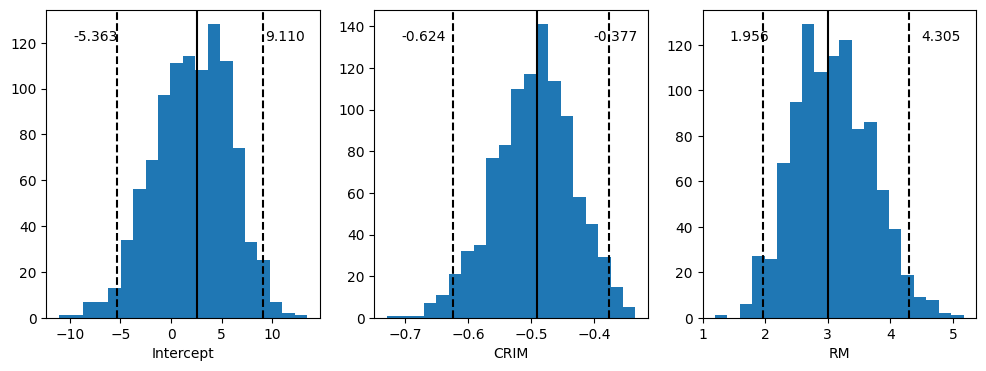

In [21]:
model = LinearRegression()
model.fit(housing[predictors], housing[outcome])

def plotDistribution(ax, values, observed, xlabel):
    ax.hist(values, bins=20)
    ax.axvline(observed, color="black")
    ax.set_xlabel(xlabel)
    ci_interval = np.percentile(values, [2.5, 97.5])
    for ci in ci_interval:
        ax.axvline(ci, color="black", linestyle="--")
    ax.text(0.1, 0.9, f"{ci_interval[0]:.3f}", transform=ax.transAxes)
    ax.text(0.8, 0.9, f"{ci_interval[1]:.3f}", transform=ax.transAxes)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plotDistribution(axes[0], intercepts, model.intercept_, "Intercept")
plotDistribution(axes[1], coefficients["CRIM"], model.coef_[0], "CRIM")
plotDistribution(axes[2], coefficients["RM"], model.coef_[1], "RM")
plt.show()

 Build a model using statsmodels

In [22]:
model = smf.ols("MEDV ~ CRIM + RM", data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1431.9896
Date:               2024-02-24 10:31 BIC:                1442.7514
No. Observations:   267              Log-Likelihood:     -712.99  
Df Model:           2                F-statistic:        107.8    
Df Residuals:       264              Prob (F-statistic): 6.03e-35 
R-squared:          0.449            Scale:              12.357   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5088    2.8215    0.8892  0.3747  -3.0467   8.0643
CRIM          -0.4904    0.0399  -12.3025  0.0000  -0.5689  -0.4119
RM             3.0083    0.4606    6.5311  0.0000   2.1013   3.9152
------------------------------------------------------------------
Omnibus

# Example: Tayko Software

 Load the data

In [23]:
# Training data
tayko_known = pd.read_csv("Tayko-known.csv")
tayko_known.head(10)

,source_a,source_b,source_r,Freq,last_update_days_ago,Web order,Spending
0,0,1,0,2,183,1,128
1,0,0,0,2,194,0,127
2,1,0,0,1,161,0,174
3,0,0,0,1,73,0,192
4,0,0,1,2,147,1,386
5,0,0,0,2,73,0,174
6,0,0,0,1,123,1,189
7,0,0,0,1,165,0,90
8,0,0,0,2,147,1,352
9,0,0,1,9,43,1,639


In [24]:
# Holdout data
tayko_unknown = pd.read_csv("Tayko-unknown.csv")
tayko_unknown.head(10)

,source_a,source_b,source_r,Freq,last_update_days_ago,Web order,Spending
0,0,1,0,3,148,1,136
1,0,0,0,3,145,0,261
2,0,0,0,1,45,1,43
3,0,0,0,6,70,0,389
4,1,0,0,4,24,1,394
5,0,0,0,6,74,0,588
6,1,0,0,1,156,1,160
7,0,0,0,2,27,1,50
8,1,0,0,1,125,0,233
9,0,0,0,1,105,1,54


 Fit a regression model to the training data

In [25]:
# define the formula for statsmodels
# note the Q notation to handle the whitespace in 'Web order'
formula = ("Spending ~ source_a + source_b + source_r + Freq + " +
    "last_update_days_ago + Q('Web order')")
model = smf.ols(formula, data=tayko_known).fit()
print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.461    
Dependent Variable:   Spending          AIC:                 6546.4415
Date:                 2024-02-24 10:31  BIC:                 6575.9437
No. Observations:     500               Log-Likelihood:      -3266.2  
Df Model:             6                 F-statistic:         72.02    
Df Residuals:         493               Prob (F-statistic):  2.82e-64 
R-squared:            0.467             Scale:               28032.   
----------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept            93.0655  22.8179  4.0786 0.0001  48.2332 137.8978
source_a             42.7556  20.5935  2.0762 0.0384   2.2938  83.2174
source_b              1.5061  37.7112  0.0399 0.9682 -72.5884  75.6007
source_r             56.27

 Fit a regression model to the training data using sklearn

In [26]:
predictors = ["source_a", "source_b", "source_r", "Freq",
          "last_update_days_ago", "Web order"]
outcome = "Spending"

model = LinearRegression()
model.fit(tayko_known[predictors], tayko_known[outcome])

LinearRegression()

 Apply the model to the holdout data and calculate RMSE

In [27]:
train_predicted = model.predict(tayko_known[predictors])
holdout_predicted = model.predict(tayko_unknown[predictors])
train_rmse = np.sqrt(np.mean((train_predicted - tayko_known[outcome]) ** 2))
holdout_rmse = np.sqrt(np.mean((holdout_predicted - tayko_unknown[outcome]) ** 2))
print(f"RMSE on training data: {train_rmse:.2f}")
print(f"RMSE on holdout data: {holdout_rmse:.2f}")

RMSE on training data: 166.25
RMSE on holdout data: 167.06


 Process of calculating RMSE demonstrated on small subset

In [28]:
df = pd.DataFrame({
    'actual': tayko_unknown[outcome][:10],
    'predicted': holdout_predicted[:10].round(0),
})
df['residual'] = df['actual'] - df['predicted']
df['sqr. residual'] = df['residual'] ** 2
df

,actual,predicted,residual,sqr. residual
0,136,239.0,-103.0,10609.0
1,261,242.0,19.0,361.0
2,43,142.0,-99.0,9801.0
3,389,534.0,-145.0,21025.0
4,394,442.0,-48.0,2304.0
5,588,532.0,56.0,3136.0
6,160,112.0,48.0,2304.0
7,50,235.0,-185.0,34225.0
8,233,135.0,98.0,9604.0
9,54,103.0,-49.0,2401.0


In [29]:
print(df['sqr. residual'].sum())
print(df['sqr. residual'].mean())
print(np.sqrt(df['sqr. residual'].mean()))

95770.0
9577.0
97.86214794290998


 Naive rule: predict the mean

In [30]:
naive_predicted = tayko_known[outcome].mean()
df = pd.DataFrame({
    'actual': tayko_unknown[outcome][:10],
    'predicted': naive_predicted.round(0),
})
df['residual'] = df['actual'] - df['predicted']
df['sqr. residual'] = df['residual'] ** 2

In [31]:
print(df['sqr. residual'].sum())
print(df['sqr. residual'].mean())
print(np.sqrt(df['sqr. residual'].mean()))

296554.0
29655.4
172.20743305676442
